<a href="https://colab.research.google.com/github/Adolfo-AB/learning-machine-learning/blob/main/basic_neural_network_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Neural Network
Implementation of a simple neural network using TensorFlow.

In [30]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

Shape of x_train: (2, 2000)
Shape of y_train: (2000, 1)


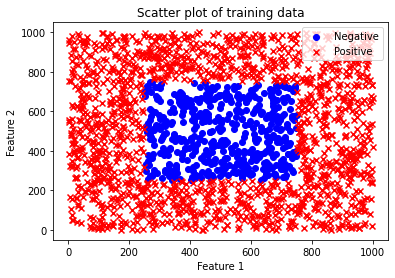

In [165]:
"""
Create some arbitrary training data.
x_train (2,1000): 2 features, 1000 samples.
y_train (1000): 1000 samples.
"""
NUMBER_OF_SAMPLES = 2000
NUMBER_OF_FEATURES = 2
RANGE = 1000

x_train = np.random.rand(NUMBER_OF_FEATURES, NUMBER_OF_SAMPLES)*RANGE

y_train = np.zeros((NUMBER_OF_SAMPLES,1))

for i in range(NUMBER_OF_SAMPLES):
  if x_train[0,i] > RANGE*0.25 and x_train[0,i] < RANGE*0.75 and x_train[1,i] > RANGE*0.25 and x_train[1,i] < RANGE*0.75:
    y_train[i] = 1

# Print the shapes of x_train and y_train
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

# Plot the training data
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of training data')
plt.scatter(x_train[0, y_train[:,0] == 1], x_train[1, y_train[:,0] == 1], c='blue', marker='o', label="Negative")
plt.scatter(x_train[0, y_train[:,0] == 0], x_train[1, y_train[:,0] == 0], c='red', marker='x', label="Positive")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of training data')
plt.legend()
plt.show()


In [199]:
model = Sequential([
    tf.keras.Input(shape=(NUMBER_OF_FEATURES,)),
    Dense(units=100, activation="relu"),
    Dense(units=150, activation="relu"),
    Dense(units=200, activation="relu"),
    Dense(units=150, activation="relu"),
    Dense(units=100, activation="relu"),
    Dense(units=50, activation="relu"),
    Dense(units=1, activation="sigmoid")
  ], name="my_model")


model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
)
model.fit(x_train.T, y_train, epochs=100)
print("")
model.summary()


Epoch 1/100
63/63 [==============================] - 1s 4ms/step - loss: 1.7742
Epoch 2/100
63/63 [==============================] - 0s 3ms/step - loss: 0.5773
Epoch 3/100
63/63 [==============================] - 0s 3ms/step - loss: 0.4557
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 0.4663
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 0.4363
Epoch 6/100
63/63 [==============================] - 0s 3ms/step - loss: 0.4395
Epoch 7/100
63/63 [==============================] - 0s 3ms/step - loss: 0.4267
Epoch 8/100
63/63 [==============================] - 0s 2ms/step - loss: 0.4150
Epoch 9/100
63/63 [==============================] - 0s 2ms/step - loss: 0.4110
Epoch 10/100
63/63 [==============================] - 0s 2ms/step - loss: 0.4222
Epoch 11/100
63/63 [==============================] - 0s 3ms/step - loss: 0.4155
Epoch 12/100
63/63 [==============================] - 0s 3ms/step - loss: 0.4263
Epoch 13/100
63/63 [=================

In [200]:
# Generate predictions for the x_train dataset
predictions = model.predict(x_train.T)

print(f"Shape of predictions: {predictions.shape}")

63/63 [==============================] - 0s 1ms/step
Shape of predictions: (2000, 1)


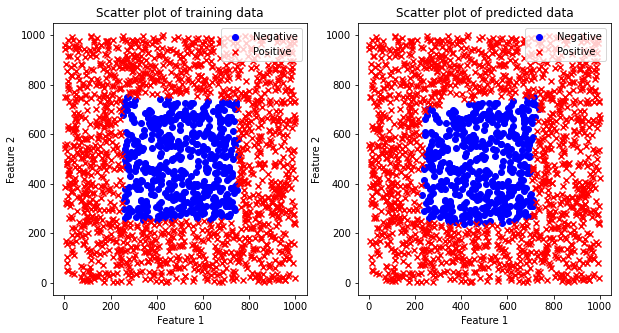

In [201]:
# Plot the training data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.scatter(x_train[0, y_train[:,0] == 1], x_train[1, y_train[:,0] == 1], c='blue', marker='o', label="Negative")
ax1.scatter(x_train[0, y_train[:,0] == 0], x_train[1, y_train[:,0] == 0], c='red', marker='x', label="Positive")
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_title('Scatter plot of training data')
ax1.legend()

ax2.scatter(x_train[0, predictions[:,0] > 0.5], x_train[1, predictions[:,0] > 0.5], c='blue', marker='o', label="Negative")
ax2.scatter(x_train[0, predictions[:,0] <= 0.5], x_train[1, predictions[:,0] <= 0.5], c='red', marker='x', label="Positive")
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_title('Scatter plot of predicted data')
ax2.legend()

plt.show()